# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [60]:
import numpy as np
import pandas as pd
import requests
import tweepy
import io
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
import matplotlib.pyplot as plt



In [61]:
d_arch=pd.read_csv('twitter-archive-enhanced.csv')




2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [62]:
url =' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url).content




In [63]:
d_image=pd.read_csv(io.StringIO(r.decode('utf-8')),sep='\t')








3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
api

In [64]:
with open ("data.json") as file:
    arr = []
    count = 0 
    while True:
        count = count + 1
        text = file.readline()
        if not text:
            break
        txt_dic = json.loads(text)
        arr.append(txt_dic)
        

In [65]:
d_json = pd.DataFrame(arr)





## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### visual assessing

In [16]:
d_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [45]:
d_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
d_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

#### programmatic assissing

In [9]:
d_arch.shape

(2356, 17)

In [6]:
d_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
d_arch[d_arch.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
d_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
d_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
d_arch.describe(include='object')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Indie. She's not a fan of baths but she's...,2017-01-27 17:04:02 +0000,https://twitter.com/dog_rates/status/687317306...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [15]:
print(len(d_arch[d_arch[['pupper','doggo','floofer','puppo']] == 'None']))

2356


In [21]:
d_arch['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1    2
https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1                                                                         2
https://twitter.com/dog_rates/status/676936541936185344/photo/1                                                                                                                                                          

In [7]:
d_image.shape

(2075, 12)

In [8]:
d_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
d_image[d_image.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [11]:
d_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [7]:
d_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
d_image.describe(include='object')

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


In [11]:
d_json.shape

(2354, 31)

In [7]:
d_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [15]:
d_json.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [34]:
d_json.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,2.014171e+16,8.162686e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,1.252797e+17,6.164161e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,3.086374e+08,7.888183e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,4.196984e+09,8.340867e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,4.196984e+09,8.664587e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79515.000000


### Quality issues
##### `d_arch` table
1. name  is  sometimes a, an , the

2. rating_denominator with 'an' name is 10 not 2 

3. jax and mingus have 	https://gofundme.com/ydvmve-surgery-.. as url in instead of https://twitter.com/dog_rates/status/  in 

4. Missing information (in_reply_to_status_id - in_reply_to_user_id   columns) 

5. Erroneous datatypes( timestamp-tweet_id -name  columns)

6. there are 2356 rows with [doggo	,floofer,	pupper	and puppo are none] which all values are none not  null

7. name is somtimes capital and small other times

8. Multiple  formats of text 


##### `d_image` table
- p1_conf ,p2_conf and p3_conf are 0.----- instead of 0.000
- The jpg_url is https://pbs.twimg.com/ext_tw_video_thumb/88734... instead of 	https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg
- Lowercase given p1,p2,p3
- in p1,p2 and p3,there are Multiple  formats of text
- Erroneous datatypes ( tweet_id column)

##### `d_json` table
- favorite_count  and retweet_count are related with d_arch table
-  Most of columns have nulls value such as (in_reply_to_status_id ,in_reply_to_status_id_str,in_reply_to_user_id in_reply_to_user_id_str )         
          


### Tidiness issues
1. 	doggo ,floofer,pupper and puppo are 4varible in 1 colunms,same the equation for rating must be in one colunm ,p1,p2,p3 must be in one columns as prediction.conf1,conf2,conf3 must be in one column as confident

2.  three tabels should be marged ( d_arch & d_json ), (d_arch & d_image) so result of merge will be d_arch.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [66]:
# Make copies of original pieces of data
d_arch_clean = d_arch.copy()







In [67]:
d_image_clean=d_image.copy()








In [68]:
d_json_clean=d_json.copy()




### Issue #1:

#### Define:
 Replace[ rating_denominator with 'an' name] with 10 instead of 2

#### Code

In [69]:
d_arch_clean= d_arch_clean[d_arch_clean['rating_denominator'] == 10]




#### Test

In [70]:
d_arch_clean[d_arch_clean['rating_denominator'] != 10]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:

#### Define
change datatypes( timestamp-tweet_id -name columns)

#### Code

In [71]:
# To category
d_arch_clean.name = d_arch_clean.name.astype('category')

# To object
d_arch_clean.tweet_id  = d_arch_clean.tweet_id.astype('object')
d_json_clean.id  = d_json_clean.id.astype('object')
d_image_clean.tweet_id  =d_image_clean.tweet_id.astype('object')
# To datetime
d_arch_clean.timestamp = pd.to_datetime(d_arch_clean.timestamp)





#### Test

In [13]:
d_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2333 non-null object
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2333 non-null datetime64[ns]
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          2333 non-null category
doggo                         2333 non-null object
floofer                       2333 non-null object
pupper                        2333 non-null object
puppo                         2333 non-null object
dtypes: category(1), 

### Issue #3:

#### Define
replace name which is sometimes a, an , the with n\a


##### Code

In [72]:
d_arch_clean['name'].replace({'None':np.nan,'a':np.nan}, inplace=True)                                                                                                                                                                             
d_arch_clean['name'].replace({'None':np.nan,'an':np.nan}, inplace=True)  
d_arch_clean['name'].replace({'None':np.nan,'the':np.nan}, inplace=True)      

#### Test

In [22]:
d_arch_clean['name'].value_counts()

charlie     12
oliver      11
lucy        11
cooper      11
lola        10
penny       10
tucker      10
winston      9
bo           9
sadie        8
buddy        7
bailey       7
toby         7
daisy        7
milo         6
scout        6
bella        6
dave         6
jack         6
jax          6
stanley      6
rusty        6
oscar        6
leo          6
koda         6
sunny        5
louis        5
chester      5
sammy        5
very         5
            ..
clarkus      1
smiley       1
cannon       1
all          1
jareld       1
jangle       1
snoop        1
franq        1
bubba        1
fwed         1
lulu         1
venti        1
tango        1
tug          1
moofasa      1
hazel        1
malikai      1
odin         1
tonks        1
antony       1
hermione     1
strudel      1
marq         1
diogi        1
colin        1
life         1
ralphson     1
huck         1
dutch        1
akumi        1
Name: name, Length: 950, dtype: int64

### Issue #4:

#### Define
Drop for (in_reply_to_status_id - in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,
                          retweeted_status_timestamp columns) which have missing informatoin

##### Code

In [73]:
d_arch_clean['in_reply_to_status_id'].isnull().sum()

2260

In [74]:
d_arch_clean['in_reply_to_user_id'].isnull().sum()

2260

In [75]:
d_arch_clean['retweeted_status_id'].isnull().sum()

2153

In [76]:
d_arch_clean['retweeted_status_user_id'].isnull().sum()

2153

In [77]:
d_arch_clean['retweeted_status_timestamp'].isnull().sum()

2153

In [78]:
d_arch_clean= d_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                          'retweeted_status_timestamp'], axis=1)


##### Test

In [79]:
d_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [57]:
d_arch_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
confedient            0
dtype: int64

### Issue #5:

#### Define
make name is small not  capital other times

#### Code

In [80]:
d_arch_clean['name']=d_arch_clean['name'].str.lower()

#### Test

In [21]:
d_arch_clean['name'].value_counts()

charlie     12
oliver      11
lucy        11
cooper      11
lola        10
penny       10
tucker      10
winston      9
bo           9
sadie        8
buddy        7
bailey       7
toby         7
daisy        7
milo         6
scout        6
bella        6
dave         6
jack         6
jax          6
stanley      6
rusty        6
oscar        6
leo          6
koda         6
sunny        5
louis        5
chester      5
sammy        5
very         5
            ..
clarkus      1
smiley       1
cannon       1
all          1
jareld       1
jangle       1
snoop        1
franq        1
bubba        1
fwed         1
lulu         1
venti        1
tango        1
tug          1
moofasa      1
hazel        1
malikai      1
odin         1
tonks        1
antony       1
hermione     1
strudel      1
marq         1
diogi        1
colin        1
life         1
ralphson     1
huck         1
dutch        1
akumi        1
Name: name, Length: 950, dtype: int64

### Issue #6:

#### Define
make  the equation for rating  in one colunm

#### Code

In [81]:
numerator =d_arch_clean['rating_numerator']
denominator = d_arch_clean['rating_denominator']
d_arch_clean['ratings'] = numerator/denominator*10



In [82]:
d_arch_clean.drop(['rating_numerator','rating_denominator'],1,inplace=True)


#### Test

In [83]:
d_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,ratings
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,None,None,None,None,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,None,None,None,None,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,None,None,None,None,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,None,None,None,None,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,None,None,None,None,12.0


### Issue #7:

#### Define
 make doggo ,floofer,pupper and puppo (are 4varible) in 1 colunm

#### Code

In [84]:
d_arch_clean['doggo']=d_arch_clean['doggo'].replace("None",'')
d_arch_clean['floofer']=d_arch_clean['floofer'].replace("None",'')
d_arch_clean['pupper']=d_arch_clean['pupper'].replace("None",'')
d_arch_clean['puppo']=d_arch_clean['puppo'].replace("None",'')


In [85]:
kind=d_arch_clean['doggo'] + d_arch_clean['floofer'] + d_arch_clean['pupper'] + d_arch_clean['puppo']
d_arch_clean['kind'] = kind

#### Test

In [86]:
d_arch_clean = d_arch_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)


In [87]:
d_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,kind
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,13.0,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,13.0,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,12.0,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,13.0,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,12.0,


### Issue #8:



#### Define
merge for d_json and d_arch so they are 2 tables not 3 tables.

#### Code

In [88]:
d_json_clean = d_json_clean[['id','favorite_count','retweet_count']]
d_json_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [89]:
d_arch_clean = d_arch_clean.merge(d_json_clean, right_on='id',left_on='tweet_id')
d_arch_clean = d_arch_clean.drop(['id'], axis = 1)



#### Test

In [90]:
d_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,kind,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,13.0,,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,13.0,,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,12.0,,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,13.0,,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,12.0,,41048,9774


### Issue #8:

#### Define

- put conf1,conf2,conf3 into one column as confedient
- merge d_arch & d_image and put result into d_arch

#### Code

In [91]:
confedient=d_image_clean['p1_conf'] + d_image_clean['p2_conf'] +d_image_clean['p3_conf'] 
d_image_clean['confedient'] =confedient


In [92]:
d_image_clean = d_image_clean.drop(['p1_conf','p2_conf','p3_conf'],axis=1)

#### Test

In [93]:
d_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_dog,p2,p2_dog,p3,p3_dog,confedient
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,True,0.683168
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True,0.653028
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,True,malinois,True,bloodhound,True,0.851242
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True,0.991582
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,True,Rottweiler,True,Doberman,True,0.958622


#### Code

In [94]:
d_image_clean = d_image_clean[['tweet_id','confedient']]
d_image_clean.head()


,tweet_id,confedient
0,666020888022790149,0.683168
1,666029285002620928,0.653028
2,666033412701032449,0.851242
3,666044226329800704,0.991582
4,666049248165822465,0.958622


In [95]:
d_arch_clean = d_arch_clean.merge(d_image_clean, right_on='tweet_id',left_on='tweet_id')

#### Test

In [96]:
d_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,kind,favorite_count,retweet_count,confedient
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,13.0,,39467,8853,0.259010
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,13.0,,33819,6514,0.483184
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,12.0,,25461,4328,0.825644
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,13.0,,42908,8964,0.379200
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,12.0,,41048,9774,0.956701


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [97]:
d_arch_clean.to_csv("twitter_archive_master.csv", index=False)
d_final = pd.read_csv("twitter_archive_master.csv")



## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [98]:
d_final.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,kind,favorite_count,retweet_count,confedient
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,phineas,13.0,NaN,39467,8853,0.259010
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,tilly,13.0,NaN,33819,6514,0.483184
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,archie,12.0,NaN,25461,4328,0.825644
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,darla,13.0,NaN,42908,8964,0.379200
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,franklin,12.0,NaN,41048,9774,0.956701


#### Which kind has better retweet_count (frequency/popularity)

In [99]:
d_final.kind.unique()


array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [100]:
d_final.dropna(inplace=True)

In [101]:
d_final['kind'] = d_final['kind'].replace(['doggopupper','doggopuppo','doggofloofer'],'doggo')




In [102]:
d_final['kind'].value_counts()

pupper     122
doggo       48
puppo       16
floofer      5
Name: kind, dtype: int64

In [103]:
largest = d_final.nlargest(7, ['retweet_count'])
largest.reset_index(drop=True, inplace=True)
largest


#to know which has high retweet_count

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,kind,favorite_count,retweet_count,confedient
0,819015337530290176,2017-01-11 02:57:27,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,https://twitter.com/dog_rates/status/819004803...,bo,14.0,doggo,0,42228,0.717996
1,819004803107983360,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,bo,14.0,doggo,95450,42228,0.717996
2,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,jamesy,13.0,pupper,106827,32883,0.985165
3,819015331746349057,2017-01-11 02:57:26,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sunny. She was also a v...,https://twitter.com/dog_rates/status/819006400...,sunny,14.0,doggo,0,21794,0.935022
4,819006400881917954,2017-01-11 02:21:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunny. She was also a very good First ...,https://twitter.com/dog_rates/status/819006400...,sunny,14.0,doggo,49960,21794,0.935022
5,822462944365645825,2017-01-20 15:17:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,https://twitter.com/dog_rates/status/822462944...,gabe,14.0,pupper,31800,17209,0.992200
6,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,barney,13.0,doggo,48410,13076,0.768157


#### if there is relation between retweet_count and favorite_count !

In [104]:
d_final.sort_values(by=['favorite_count','retweet_count'],ascending=[False,False]).head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,kind,favorite_count,retweet_count,confedient
112,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,jamesy,13.0,pupper,106827,32883,0.985165
357,819004803107983360,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,bo,14.0,doggo,95450,42228,0.717996
356,819006400881917954,2017-01-11 02:21:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunny. She was also a very good First ...,https://twitter.com/dog_rates/status/819006400...,sunny,14.0,doggo,49960,21794,0.935022
194,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,barney,13.0,doggo,48410,13076,0.768157
307,826848821049180160,2017-02-01 17:44:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,cupid,13.0,doggo,40325,11878,0.899394


#### what kind of doges has high rates !

In [105]:
d_final[ d_final['ratings']>14.0 ]

,tweet_id,timestamp,source,text,expanded_urls,name,ratings,kind,favorite_count,retweet_count,confedient
612,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,sophie,27.0,pupper,7320,1885,0.969187


#### we note that maxiunm rates are 27, 14,13 so we need to know precentage of doges kind


In [106]:
d_final[ (d_final['ratings']>=14.0 )| (d_final['ratings']==13.0)]



,tweet_id,timestamp,source,text,expanded_urls,name,ratings,kind,favorite_count,retweet_count,confedient
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,cassie,14.0,doggo,32467,7711,0.991605
14,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,stuart,13.0,puppo,15359,2321,0.975234
41,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,grizzwald,13.0,floofer,22986,3825,0.997236
63,878776093423087618,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,snoopy,13.0,puppo,19763,4319,0.924896
78,874296783580663808,2017-06-12 16:06:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,jed,13.0,pupper,26651,4308,0.871809
80,874012996292530176,2017-06-11 21:18:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,sebastian,13.0,puppo,35501,11007,0.972478
112,866450705531457537,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,jamesy,13.0,pupper,106827,32883,0.985165
170,851953902622658560,2017-04-12 00:23:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,https://twitter.com/dog_rates/status/829374341...,astrid,13.0,doggo,0,10706,0.955020
194,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,barney,13.0,doggo,48410,13076,0.768157
199,845397057150107648,2017-03-24 22:08:59,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",mimosa,13.0,doggo,8241,2072,0.762926


### Insights:
1.As the counts of tweets increases, the number of favorite increases

2.The most frequent and popular types of dogs and the number of tweets in order 
pupper
doggo
puppo
floofer

3.The types of dogs with the two highest ratings, in order of percentage
doggo
puper
puppo
floofer


### Visualization

#### if favorite_count increases with retweet_count ,we can use any one of them

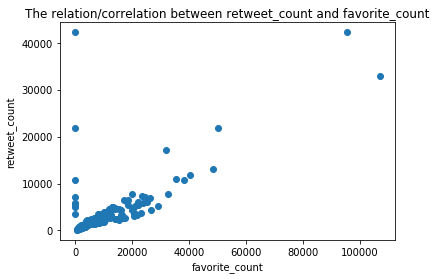

In [107]:
favorite_count = d_final['favorite_count']
retweet_count = d_final['retweet_count']
plt.scatter(favorite_count,	retweet_count, label = "points")
plt.title('The relation/correlation between retweet_count and favorite_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.show()

#### the first retweet_count is pupper
the seconed is doggo
the third is puppo
the fourth is floofer

Text(0.5,1,'Types of dogs')

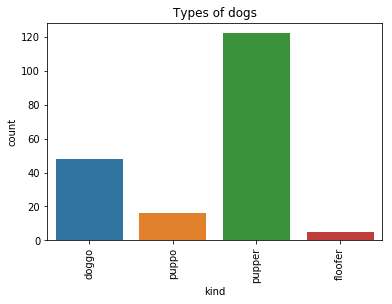

In [108]:
sns.countplot(d_final['kind']).set_xticklabels(sns.countplot(d_final['kind']).get_xticklabels(), rotation=90)
plt.title('Types of dogs')

###### the first high rates is doggo
the seconed is puper
the third is puppo
the fourth is floofer

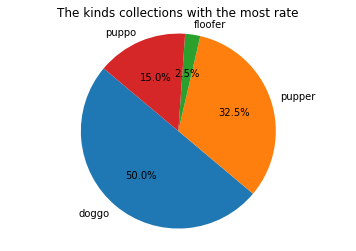

In [109]:
# rate for each  kind
kind = ['doggo', 'pupper', 'floofer', 'puppo']
rate = [20,13,1, 6]
plt.pie(rate, labels=kind, 
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('The kinds collections with the most rate')
plt.show()
